# **4-2 - CLV Based RFM Segmentation**

Marketing and Customer Analytics

---

**Outline**

1. Business Understanding
2. Modelling Workflow
3. Data Pipelines
4. EDA
5. Preprocessing
6. Clustering
7. Business Recommendation

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Business Understanding**
----
Company ZYX wants to create targeted marketing campaigns and also needs to allocate their marketing resources efficiently, but Company ZYX recognizes that not all customers have the same needs, preferences, or purchasing behaviors



## **1.2 Business Objectives**
----
- Company ZYX aims to personalize marketing strategies to increase customer retention and maximize revenue with effective marketing spending
- The company also wants to identify high-value customers to give them personalized marketing

## **1.3 Business Question**
---
- How can we effectively segment our customer base to better understand customer behavior and implement targeted marketing strategies?



## **1.4 Define Problem**
----
- What are the inputs? Purchasing behavior records: recency, frequency, and monetary.
- What are the outputs? Customer segments
- What do we do with the segmentation? Marketing team will treat each segment based on their characteristics, e.g. create a loyalty coupon

## **1.5 Modelling Task**
---
- **Task:**
  - Clustering
- **Model used:**
  - K-means
- **Cluster Evaluation:**
  - Elbow method

# **2. Modelling Workflow**

## **Machine Learning Workflow** (Simplified)
---

### 1. <font color='blue'> Importing Data to Python</font>
    * Data validation
### 2. <font color='blue'> Exploratory Data Analysis</font>
    * Data exploration
### 3. <font color='blue'> Data Preprocessing</font>
    * Missing value handling, feature engineering, and normalization
### 4. <font color='blue'> Modeling</font>
    * Finding best model
### 5. <font color='blue'> Recommendation</font>
    * Business recommendation and Actionable insights

# **3. Importing Data to Python**
---

## **3.1 Data Description**
---

The worksheet Raw Data contains these data for a sample of 2357 CDNOW customers who made their first purchase at the web site during the first quarter of 1997.
- `Recency`: Recency value in week duration (e.g., Recency 30.43 is second repeat purchase occurring on the third day of the 30th week of 1997)
- `Frequency`: How many **repeat purchase** made by customer (e.g., frequency = 0 means the customer made only once purchase, no repeat purchase)
- `Monetary`: Monetary value for each customer in USD
- `Tenure`: The transaction age of customer --> We don't need this variable for segmentation

Adapted from:

Implementing the BG/NBD Model for Customer Base Analysis in Excel - Peter Fader, Bruce Hardie, Ka Lok Lee with additional monetary generated data

## **3.2 Importing Data**
---

In [2]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        input path

    Returns
    -------
    df : pandas Dataframe
        Sample dataframe
    """
    # 1. Read data
    data = pd.read_csv(path, index_col = 0)

    # 2. drop duplicates
    data['customer ID'].drop_duplicates(inplace=True)

    # 3. print data shape
    print('Data shape :', data.shape)

    return data


In [3]:
# Read data
data = read_data(path = 'rfm_data.csv')

Data shape : (2357, 5)


In [4]:
data.head()

,customer ID,Frequency,Recency,Tenure,Monetary
0,1,2,30.428571,38.857143,18.174378
1,2,1,1.714286,38.857143,304.824119
2,3,0,0.000000,38.857143,217.815232
3,4,0,0.000000,38.857143,106.408642
4,5,0,0.000000,38.857143,184.223019


In [5]:
# check data type
data.dtypes

,0
customer ID,int64
Frequency,int64
Recency,float64
Tenure,float64
Monetary,float64


# **4. Exploratory Data Analysis**
---

In [6]:
# copy data
eda_data = data.copy()

# validate
print('Original data shape :', data.shape)
print('EDA data shape      :', eda_data.shape)

Original data shape : (2357, 5)
EDA data shape      : (2357, 5)


## **4.1 Check data Description**
----

In [7]:
eda_data.describe()

,customer ID,Frequency,Recency,Tenure,Monetary
count,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
mean,1179.000000,1.042427,6.845809,32.715862,181.068994
std,680.551615,2.190014,10.731444,3.326951,130.584872
min,1.000000,0.000000,0.000000,27.000000,1.196479
25%,590.000000,0.000000,0.000000,29.857143,85.699669
50%,1179.000000,0.000000,0.000000,32.714286,151.150419
75%,1768.000000,1.000000,12.000000,35.428571,243.467461
max,2357.000000,29.000000,38.428571,38.857143,998.508965


## **4.2 Check missing values**
---

In [8]:
eda_data.isna().sum()

,0
customer ID,0
Frequency,0
Recency,0
Tenure,0
Monetary,0


## **4.3 Check Recency Value**
----

In [9]:
# stats descriptive
eda_data['Recency'].describe()

,Recency
count,2357.000000
mean,6.845809
std,10.731444
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,38.428571


Text(0.5, 1.0, 'Recency Distribution')

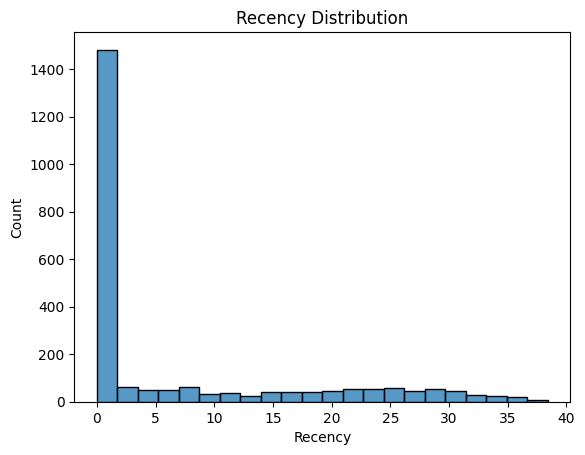

In [10]:
# check distribution
sns.histplot(eda_data['Recency'])
plt.title('Recency Distribution')

## **4.4 Check Frequency Value**

In [11]:
# stats descriptive
eda_data['Frequency'].describe()

,Frequency
count,2357.000000
mean,1.042427
std,2.190014
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,29.000000


(0.0, 15.0)

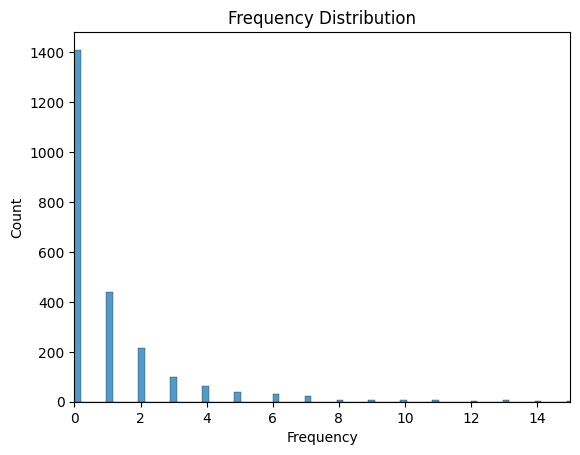

In [12]:
# check distribution
sns.histplot(eda_data['Frequency'], bins=150)
plt.title('Frequency Distribution')
plt.xlim(0,15)

In [13]:
# check customer with single purchase history
print(f"There are {eda_data[eda_data['Frequency'] == 0].shape[0]} "
      f"people who has single purchase history")

There are 1411 people who has single purchase history


## **4.5 Check Monetary Value**

In [14]:
# stats descriptive
eda_data['Monetary'].describe()

,Monetary
count,2357.000000
mean,181.068994
std,130.584872
min,1.196479
25%,85.699669
50%,151.150419
75%,243.467461
max,998.508965


Text(0.5, 1.0, 'Monetary Distribution')

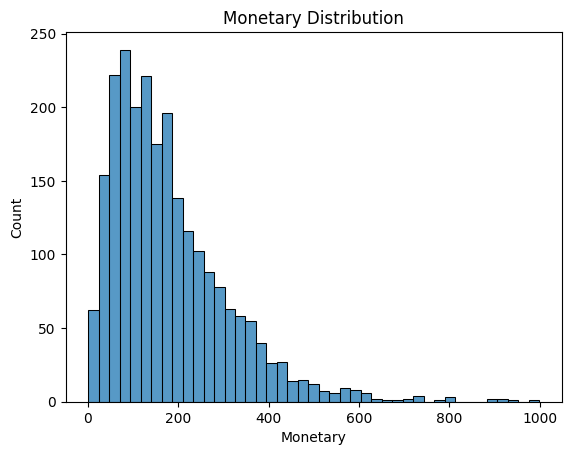

In [15]:
# check distribution
sns.histplot(eda_data['Monetary'])
plt.title('Monetary Distribution')

## **4.6 Summary**

- We don't need to handle missing values
- We need to normalize the value before clustering in K-means
- We need to drop ID and Tenure for clustering

# **5. Preprocessing**
----
- Drop unused columns
- Normalize the data

## **5.1 Drop ID and Tenure**
---

In [16]:
def drop_col(data, columns):
    """
    Function to drop the unused columns

    Parameters
    ----------
    data: pandas Dataframe
        raw data before dropping

    columns: list
        list of columns we want to drop

    Returns
    -------
    clean_data: pandas Dataframe
        dataframe with dropped unused columns
    """
    clean_data = data.drop(columns, axis=1)

    return clean_data

In [17]:
clean_data = drop_col(data = data,
                      columns = ['customer ID', 'Tenure'])

In [18]:
# check
clean_data.head()

,Frequency,Recency,Monetary
0,2,30.428571,18.174378
1,1,1.714286,304.824119
2,0,0.000000,217.815232
3,0,0.000000,106.408642
4,0,0.000000,184.223019


## **5.2 Normalize Data**

Why we need to normalize data in clustering K-Means?
- K-Means algorithm uses Euclidean distance that is highly prone to irregularities in the size of various features
- Normalize data before K-Means to handle feature size differences and improve clustering accuracy.

In [19]:
# Fit & transform scaler
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    Returns
    -------
    scaler : object
        The Min-Max scaler
    """
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    scaler : object
        The Min-Max scaler

    Returns
    -------
    data_clean : object
        The clean data
    """
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(data))
    data_clean.index = data.index
    data_clean.columns = data.columns

    # Validate
    print("Data shape :", data.shape)

    return data_clean

In [20]:
# Fit a scaler
scaler = fit_scaler(data = clean_data)

# Transform data
scaled_data = transform_scaler(data = clean_data,
                               scaler = scaler)

scaled_data.head()

Data shape : (2357, 3)


,Frequency,Recency,Monetary
0,0.068966,0.791822,0.017024
1,0.034483,0.044610,0.304446
2,0.000000,0.000000,0.217202
3,0.000000,0.000000,0.105496
4,0.000000,0.000000,0.183520


In [21]:
# check the result of minmaxscaler
scaled_data.describe()

,Frequency,Recency,Monetary
count,2357.000000,2357.000000,2357.000000
mean,0.035946,0.178144,0.180357
std,0.075518,0.279257,0.130937
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.084731
50%,0.000000,0.000000,0.150358
75%,0.034483,0.312268,0.242924
max,1.000000,1.000000,1.000000


# **6. K-means Clustering**

## **6.1 Elbow Method**

In [22]:
# Import package
from sklearn.cluster import KMeans

In [23]:
# check data
scaled_data.head()

,Frequency,Recency,Monetary
0,0.068966,0.791822,0.017024
1,0.034483,0.044610,0.304446
2,0.000000,0.000000,0.217202
3,0.000000,0.000000,0.105496
4,0.000000,0.000000,0.183520


In [24]:
np.array(scaled_data)

array([[0.06896552, 0.79182156, 0.01702365],
       [0.03448276, 0.04460967, 0.30444584],
       [0.        , 0.        , 0.21720249],
       ...,
       [0.        , 0.        , 0.15197329],
       [0.13793103, 0.69144981, 0.14791455],
       [0.        , 0.        , 0.13037673]])

In [25]:
# Set empty list
inertia = []

# iterate for
for k in range(1, 11):
    # create
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # fit object
    kmeans.fit(scaled_data)

    # append results
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

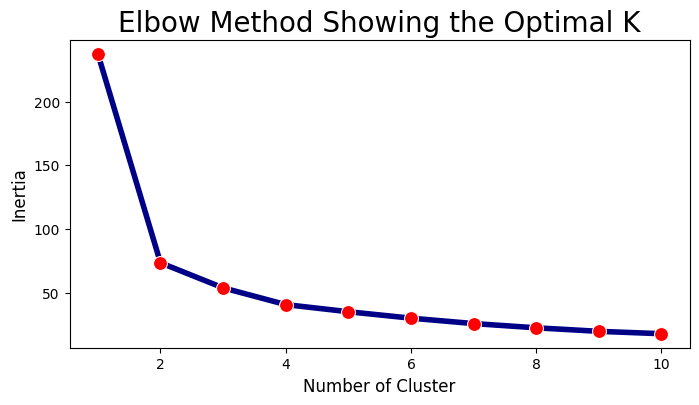

In [26]:
plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

**Review elbow method**

---

- The optimal number of clusters is the point where adding another cluster does not significantly decrease WCSS
- This point can be found by looking for a sharp bend or elbow in the WCSS graph
- If so, then adding more clusters does not improve the clustering performance

$$
\text{WCSS} = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_{(ij)} - c_{(j)}||^2
$$

where:
- n represents the total number of data points
- k represents the total number of clusters
- xi represents the ith data point
- cj represents the jth cluster centroid




Elbow method analysis

- Based on the Elbow method information, We will cluster our customer into 2 groups
- But as business perspective, we have around 3-4 source and budget allocation to give initiative up to 4 groups
- We will try to cluster our customer into 4 groups

## **6.2 K-means Clustering**

In [27]:
# Refit best data
kmeans_best = KMeans(n_clusters = 4,
                     random_state = 42,
                     n_init = 10)
# fit
kmeans_best.fit(scaled_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [28]:
# Predict
data_label = kmeans_best.predict(scaled_data)
data_label

array([2, 1, 3, ..., 3, 2, 3], dtype=int32)

In [29]:
# Get the coordinates of the centroids
centroids = kmeans_best.cluster_centers_

In [30]:
# create dataframe
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency',
                                    'Frequency',
                                    'Monetary']).rename_axis('Cluster',
                                                             axis='index')

# show dataframe centroid
centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.073907,0.428679,0.182181
1,0.009455,0.026699,0.362987
2,0.142073,0.749579,0.173839
3,0.007554,0.016613,0.119147


In [31]:
# Build data
data_cluster = scaled_data.copy()

data_cluster['label'] = data_label
data_cluster.head()

,Frequency,Recency,Monetary,label
0,0.068966,0.791822,0.017024,2
1,0.034483,0.044610,0.304446,1
2,0.000000,0.000000,0.217202,3
3,0.000000,0.000000,0.105496,3
4,0.000000,0.000000,0.183520,3


## **6.3 RFM Weights**

- Assume we have implemented AHP method
- The result of AHP we gain information:

```python
Recency Frequency Monetary
  0.351	0.041	0.119
```

- `Recency` is given the highest weight because recent customer behavior provides valuable insights into their current preferences and engagement levels.
- It emphasizes the importance of staying updated with customer needs and trends.

<br>

- `Frequency` is assigned a relatively higher weight compared to monetary value because customers who interact more frequently with a business tend to be more loyal.
- It recognizes the significance of building long-term relationships and fostering customer engagement.

<br>

- `Monetary` value is given a relatively lower weight because solely focusing on the amount of money spent may not fully capture customer behavior and loyalty.

In [32]:
weight = [0.351, 0.041, 0.119]

In [33]:
def get_cluster_clv(df, weight):
  """
  Function to get clv of each cluster

  Parameters
  ----------
  df: pandas Dataframe
      clustered dataframe

  weight: list
      weight of each RFM variables

  Returns
  -------
  clv_per_cluster: pandas Dataframe
      dataframe with clv each cluster
  """

  # group the data
  group = df.groupby('label')[['Recency',
                               'Frequency',
                               'Monetary']].mean()

  # calculate clv
  group['CLV'] = group['Recency']*weight[0] \
                 + group['Frequency']*weight[1] \
                 + group['Monetary']*weight[2]

  return group

In [34]:
cluster_clv = get_cluster_clv(df = data_cluster,
                              weight = weight)

In [35]:
cluster_clv

,Recency,Frequency,Monetary,CLV
label,,,,
0,0.428679,0.073907,0.182181,0.175176
1,0.026761,0.009477,0.363266,0.053010
2,0.749579,0.142073,0.173839,0.289614
3,0.016600,0.007548,0.119244,0.020326


In [36]:
def rank_customers_by_clv(df):
    """
    Rank customers based on their Customer Lifetime Value (CLV).

    Parameters:
    -----------
    df: pandas DataFrame
        dataframecontaining customer data with a 'CLV' column.

    Returns:
    --------
    ranked_df: pandas DataFrame
        dataframe with an additional 'Rank' column representing the CLV rank.
    """
    # Sort the dataframe by CLV in descending order
    ranked_df = df.sort_values(by='CLV', ascending=False)

    # Add a 'Rank' column based on the sorted order
    ranked_df['Rank'] = range(1, len(ranked_df) + 1)

    return ranked_df


In [37]:
ranked_df = rank_customers_by_clv(df = cluster_clv)
ranked_df

,Recency,Frequency,Monetary,CLV,Rank
label,,,,,
2,0.749579,0.142073,0.173839,0.289614,1
0,0.428679,0.073907,0.182181,0.175176,2
1,0.026761,0.009477,0.363266,0.053010,3
3,0.016600,0.007548,0.119244,0.020326,4


In [38]:
# create segment name
ranked_df['Segment'] = np.where(ranked_df['Rank'] == 1, 'Best Customers',
                       np.where(ranked_df['Rank'] == 2, 'Potential Customers',
                                'At Risk Customers'))

In [39]:
ranked_df

,Recency,Frequency,Monetary,CLV,Rank,Segment
label,,,,,,
2,0.749579,0.142073,0.173839,0.289614,1,Best Customers
0,0.428679,0.073907,0.182181,0.175176,2,Potential Customers
1,0.026761,0.009477,0.363266,0.053010,3,At Risk Customers
3,0.016600,0.007548,0.119244,0.020326,4,At Risk Customers


Summary
- Our highest weight is Recency, the recommendation must follow the recency-related recommendation
- We have 3 segments (rank 3 and 4 will be 1 group because they have similar CLV value)

---
Recommendation:

`best customers`
- We can implement loyalty / membership program to this customer in order to increase receny value by pushing notiffication about cross-selling and upselling promotion
- Create personalized marketing:
  - Personalized thank-you notes or cards with a handwritten message expressing our appreciation for their continued support
  - personalized email: "As a token of our appreciation, we're offering you an exclusive early access to our upcoming sale event. Be the first to grab your favorite items before anyone else!"
- Spend/allocate most of the marketing budget to give marketing treatment on this group

----


`potential customers`
- We can implement retention strategy such as periodically promotion type:
  - It looks like every month / every period, there's a marketing promotion (e.g., 12.12 , Harbolnas , WIB , Black Friday)
  - So we can keep our customer recency high (we want to our customer recently purchase time by time)
- We can impement pop up nottification:
  - For potential customer, they can potentially grab / take our promotion via email and app push notification
  - We can send them new product launch, recently view recommendation, and cart abandonment nottification in order to increase the conversion rate
- Spend higher budget on this group rather than at risk group

-----



`at risk customer`
- less valuable customer
- We can retain them by giving lower price offering / dicount promotion:
  - This type of customer aren't loyal customer, so we can attract them by offering lower price sale
  - They will be attracted by low price offering (such as discount / cashback)
  - But we don't need to spend much money to retain this customer, therefore we need other way of retaining: excelent customer service
- We implement excelent customer service:
  - Provide prompt and friendly customer support across various channels (phone, email, chat) to address inquiries, concerns, and issues effectively.
  - Train customer service representatives to actively listen, empathize, and offer personalized solutions, ensuring a positive customer experience.
  - Keep customers engaged through interactive content, surveys, or contests that solicit their feedback and opinions.
- Most of these customer more likely to churn, we need to spend the budget wisely, don't spend to much to retain this group of customers